<a href="https://colab.research.google.com/github/MadMush/Healthcare-EDA-Random-Forest-and-XGB-Classifier/blob/main/Healthcare%20-%20EDA%2C%20Random%20Forest%20and%20XGB%20Classifier%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/healthcare_dataset.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


# **Dataset Info**

In [3]:
df.shape

(10000, 15)

In [4]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [5]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [8]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

# **Calculating Length of Stay**

In [9]:
for date in['Date of Admission', 'Discharge Date']:
  df[date]=pd.to_datetime(df[date])

In [10]:
df['Length of Stay'] = df['Discharge Date'] - df['Date of Admission']
df['Length of Stay']

0      14 days
1      14 days
2      30 days
3       1 days
4      24 days
         ...  
9995    4 days
9996   23 days
9997   14 days
9998   20 days
9999   24 days
Name: Length of Stay, Length: 10000, dtype: timedelta64[ns]

In [11]:
df['Length of Stay'] = df['Length of Stay'].astype('str').str.split(' ', expand=True)[0]
df['Length of Stay'] = df['Length of Stay'].astype('int')

In [12]:
df['Length of Stay']

0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: Length of Stay, Length: 10000, dtype: int64

In [13]:
df.drop('Date of Admission', axis=1, inplace=True)
df.drop('Discharge Date', axis=1, inplace=True)
df.drop('Doctor', axis=1, inplace=True)
df.drop('Hospital', axis=1, inplace=True)
df.drop('Room Number', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)

In [14]:
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Length of Stay
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24
...,...,...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,UnitedHealthcare,39606.840083,Elective,Ibuprofen,Abnormal,4
9996,47,Female,AB+,Arthritis,Blue Cross,5995.717488,Emergency,Ibuprofen,Normal,23
9997,54,Male,B-,Arthritis,Blue Cross,49559.202905,Elective,Ibuprofen,Normal,14
9998,84,Male,A+,Arthritis,UnitedHealthcare,25236.344761,Urgent,Penicillin,Normal,20


# **Data Visualization**

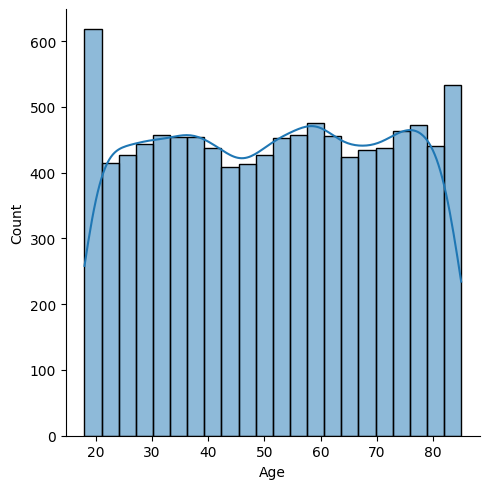

In [15]:
sns.displot(df['Age'], kde='True', bins='auto')

<Axes: xlabel='Length of Stay', ylabel='count'>

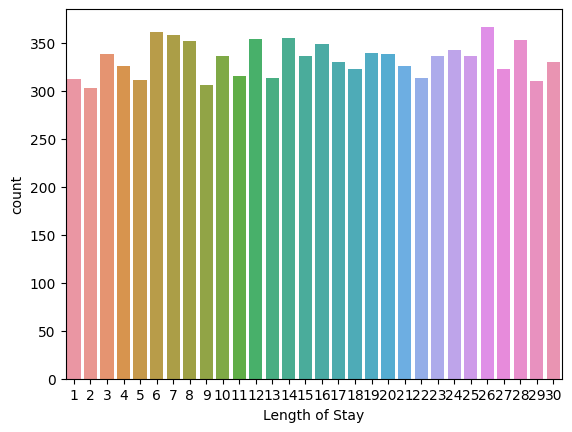

In [16]:
sns.countplot(x='Length of Stay',data=df)

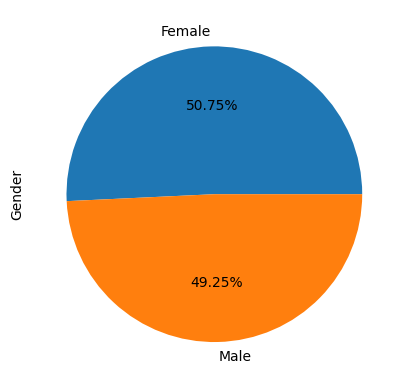

In [17]:
df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

<Axes: xlabel='Blood Type', ylabel='count'>

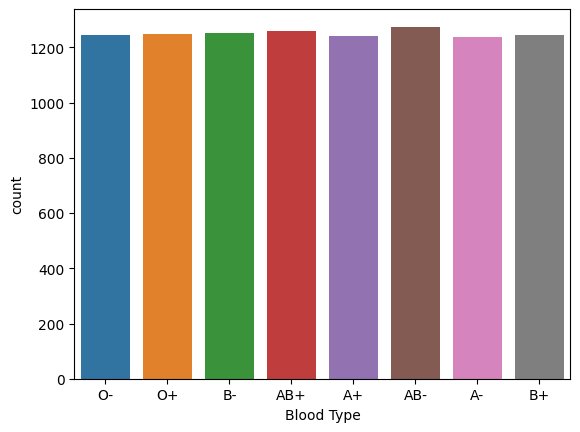

In [18]:
sns.countplot(x='Blood Type',data=df)

<Axes: xlabel='Medical Condition', ylabel='count'>

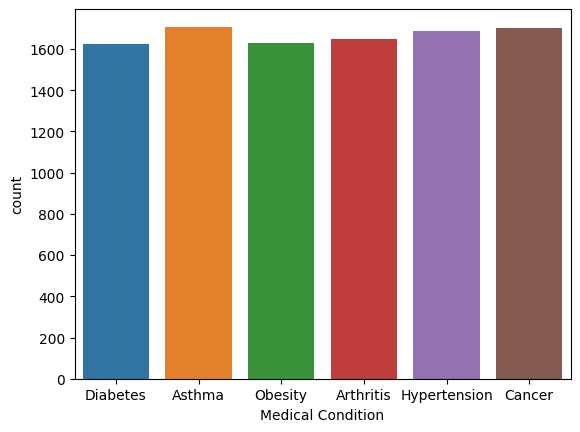

In [19]:
sns.countplot(x='Medical Condition',data=df)

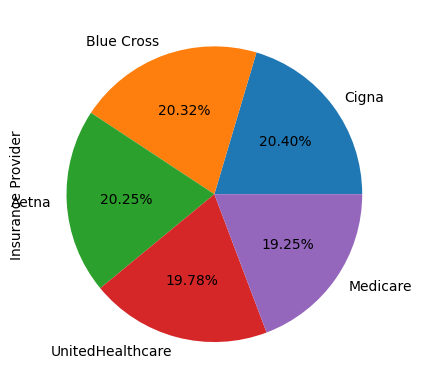

In [20]:
df['Insurance Provider'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

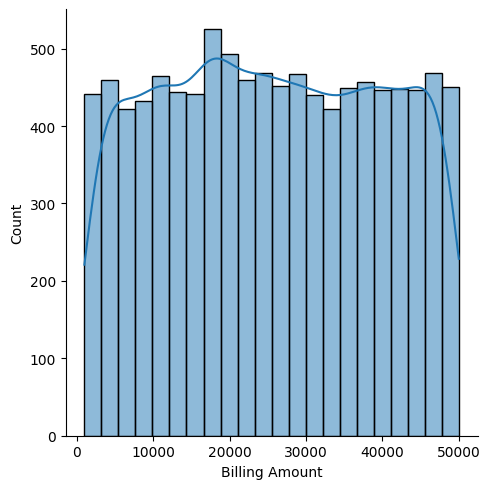

In [21]:
sns.displot(df['Billing Amount'], kde='True', bins='auto')

<Axes: xlabel='Admission Type', ylabel='count'>

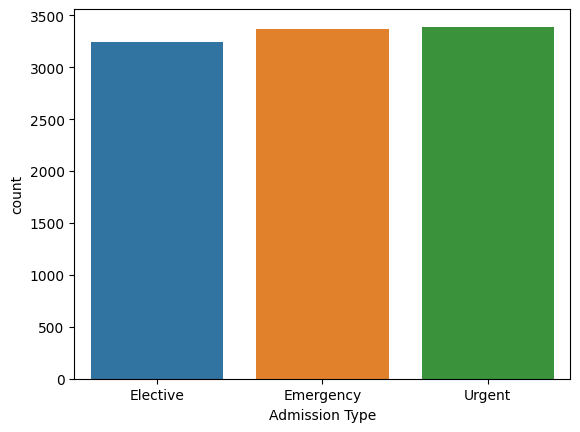

In [22]:
sns.countplot(x='Admission Type', data=df)

<Axes: xlabel='Medication', ylabel='count'>

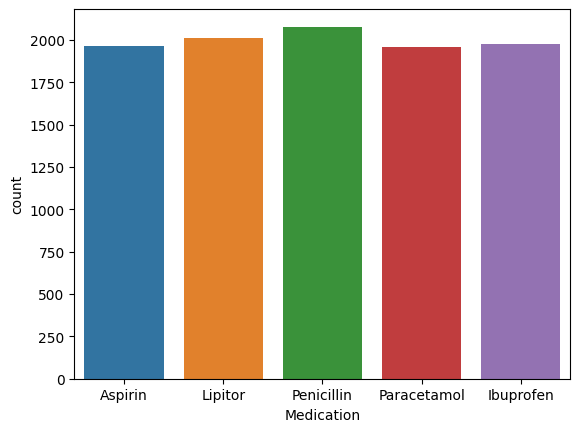

In [23]:
sns.countplot(x='Medication', data=df)

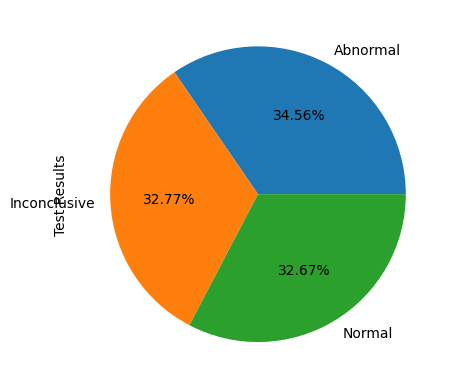

In [24]:
df['Test Results'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.show()

# **Label Encoding**

In [25]:
df.drop('Insurance Provider', axis=1, inplace=True)
df.drop('Billing Amount', axis=1, inplace=True)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type',
       'Medication', 'Test Results', 'Length of Stay'],
      dtype='object')

In [28]:
lc=LabelEncoder()
cols=['Gender', 'Blood Type', 'Medical Condition','Admission Type', 'Medication','Test Results']
for i in cols:
  df[i]=lc.fit_transform(df[i])

In [29]:
df

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Length of Stay
0,81,0,7,3,0,0,1,14
1,35,1,6,1,1,2,2,14
2,61,1,5,5,1,2,2,30
3,49,1,5,1,2,4,0,1
4,51,1,7,0,2,3,2,24
...,...,...,...,...,...,...,...,...
9995,83,1,0,5,0,1,0,4
9996,47,0,2,0,1,1,2,23
9997,54,1,5,0,0,1,2,14
9998,84,1,0,0,2,4,2,20


# **Random Forest Classifier**

In [30]:
X=df.drop(['Test Results'],axis=1)
y=df['Test Results']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 26)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model1 = RandomForestClassifier(n_estimators=100)
model1.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
predictions = model1.predict(X_test)
accuracy=accuracy_score(y_test,predictions)
accuracy

0.3416666666666667

# **XBG Classifier**

In [37]:
from xgboost import XGBClassifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 26)

In [39]:
model2= XGBClassifier()
model2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [40]:
predictions1=model2.predict(X_test)
accuracy=accuracy_score(y_test,predictions1)
accuracy

0.338